In [5]:
library(genbankr)
library(tidyverse)
gb_entries_filepath <- file.path(Sys.getenv("HOME"), "VIRAL_BIX", "data", "sars_genomes.gb")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
library(tidyverse)

In [22]:
library(tidyverse)
multiple_gb_entries <- function(gb_entries_filepath) {
    txt <- read_file(gb_entries_filepath)
    txt.split <- txt %>%
      str_split("\n//\n") %>%
        unlist
}

In [23]:
gb_entries <- multiple_gb_entries(gb_entries_filepath)

In [24]:

for(gb_entry in gb_entries) {
    print(nchar(gb_entry))
   gb <- readGenBank(text=gb_entry)
}

[1] 61968


genes not available for all CDS ranges, using internal grouping ids

No exons read from genbank file. Assuming sections of CDS are full exons

No transcript features (mRNA) found, using spans of CDSs



[1] 38767


Warning message in split.default(text, fldnames):
“data length is not a multiple of split variable”
Warning message in make_feat_gr(str = rngstr, chr = chr, ats = c(type = type, attrs), :
“NAs introduced by coercion”


ERROR: Error in switch(seqtype, bp = DNAString(chars), aa = AAString(chars), : EXPR must be a length 1 vector


In [1]:
library(DECIPHER)

ERROR: Error in library(DECIPHER): there is no package called ‘DECIPHER’


In [2]:

BiocManager::install("DECIPHER")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Installing package(s) 'DECIPHER'




The downloaded binary packages are in
	/var/folders/vh/3g2pqnc50bx2hqkx1fghgdsw0000gp/T//RtmpmXrNqi/downloaded_packages


Old packages: 'MASS', 'nlme'



In [3]:
fasta_filepath <- file.path(Sys.getenv("HOME"), "VIRAL_BIX", "data", "NC_045512.fasta")

In [4]:
library(DECIPHER)

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading required package: GenomeInfoDb


Attaching package: ‘Biostrings’


The following o

In [5]:
genome <- readDNAStringSet(fasta_filepath)

In [6]:
genome

DNAStringSet object of length 1:
    width seq                                               names               
[1] 29903 ATTAAAGGTTTATACCTTCCCAG...AAAAAAAAAAAAAAAAAAAAAAA NC_045512.2 Sever...

In [7]:
options(continue=" ")
options(width=80)
options(SweaveHooks=list(fig=function()
	par(mar=c(4.1, 4.1, 0.3, 0.1))))
set.seed(123)

Iter  Models Start Motif  Init  Fold UpsNt  Term   RBS  Auto  Stop Genes
7          4  5.14  2.95 11.31  1.04  5.37  4.95  2.48  4.22  0.30    11

Time difference of 8.81 secs



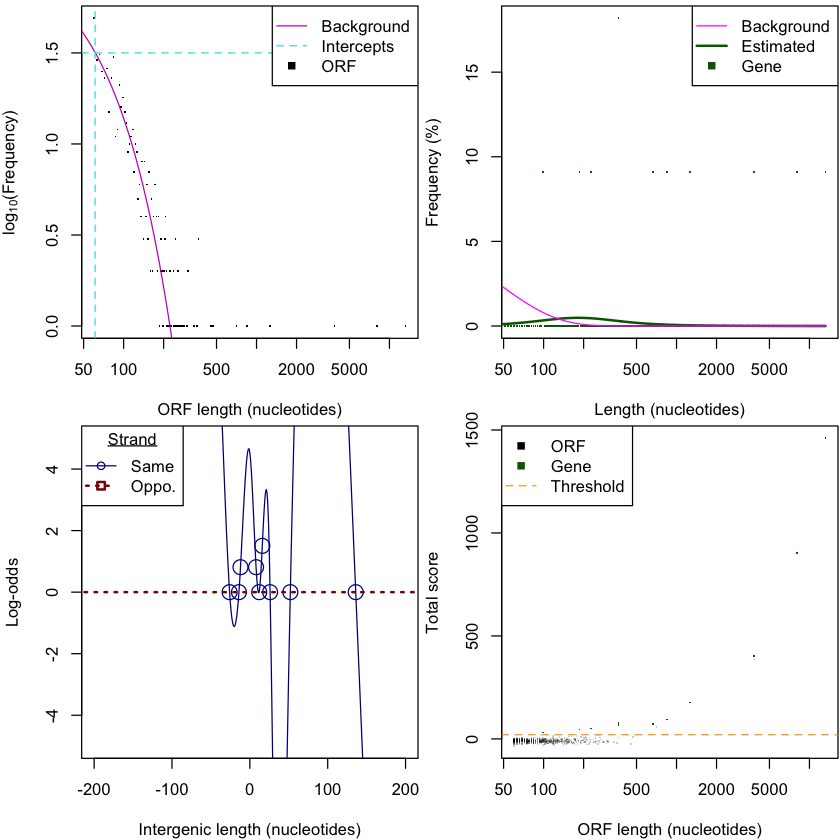

In [8]:
getOption("SweaveHooks")[["fig"]]()
orfs <- FindGenes(genome, showPlot=TRUE, allScores=TRUE)

In [9]:
orfs

Genes object of size 3,109 specifying:
11 protein coding genes from 99 to 13,218 nucleotides.
3,098 open reading frames from 60 to 13,167 nucleotides.

  Index Strand Begin End TotalScore ... Gene
1     1      0     2 136      -0.76 ...    0
2     1      1    10 108      -7.78 ...    0
3     1      1    10 123     -17.61 ...    0
4     1      0    59 136     -25.70 ...    0
5     1      0    84 143      -7.43 ...    0
6     1      1   133 216      -8.43 ...    0
... with 3,103 more rows.

In [10]:
orfs[[1]]

[1] 1